>> # SYRIATEL CUSTOMER CHURN ANALYSIS AND MODELING 

Churn is when a subscriber cancels, stops or does not renew a subscription

# BUSINESS UNDERSTANDING

Telecommunication is fast growing industry that has so much competition and many options for clients to choose from.

SyriaTel, a telecommunications company wants to reduce money spent in the event of loosing customers and acquistion of new customers. The task at hand is to use machine learning algorithms to be able to predict the likelihoold of a customer churning from syriaTel.

We plan on using predictive modeling to be able to identify the possibility and which customer will probably churn and this will help Syriatel to make more informed decision in bid to reduce customer churn and improve profits.

## MAIN OBJECTIVE 

- To be able to build a model that is able to predict whether a customer will churn

> * Specific objectives
 - To predict whether a customer will churn or not
 - To identify which variables affect possibility of customer churn
 - To visualize the relationship and distribution of various variables



# DATA UNDERSTANDING

In [69]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier



# checking the data

In [70]:
#importring data
df = pd.read_csv("churnning.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [71]:
#checking number of records in rows and columns
print(f"This data set contains {(df.shape)} rows and columns")


This data set contains (3333, 21) rows and columns


In [72]:
#checking data types 
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [73]:
#checking counts for each data type
df.dtypes.value_counts()

float64    8
int64      8
object     4
bool       1
dtype: int64

From above we can see that the dataset has 21 different columns 

The data has four different data types.

# Tidying and cleaning our data

### Data preparation


In [75]:
#checking for missing values
missing_values = df.isnull().sum()
missing_values

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [76]:
#checking for duplicates
duplicated_values = df.duplicated().sum()
duplicated_values

0

This data set does not have missing value and duplicated values so  it clean and ready for further analysis

# EDA

From above we realized that the data has 4 different data types and no missing or duplicate values so we can go and explore the data and check for distributions and patterns. 

In [77]:
# checking categoricals columns 
categorical_columns = df.select_dtypes(include="object")
print(categorical_columns.columns)
categorical_columns.head()

Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')


,state,phone number,international plan,voice mail plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no
4,OK,330-6626,yes,no


In [78]:
# checking numerical columns
numerical_columns = df.select_dtypes(include= "number")
print(numerical_columns.columns)
numerical_columns.head()


Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [79]:
#checking boolean 
boolean_columns = df.select_dtypes(include= "bool")
print(boolean_columns.columns)
boolean_columns.head()

Index(['churn'], dtype='object')


,churn
0,False
1,False
2,False
3,False
4,False


In [149]:
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

# Categorical columns

## analysis of single variables

In [175]:
# plotting categorical values and printing their values counts
def count_plot_for(feature):
  sns.countplot(data=df, x=feature)
  plt.title(feature)
  plt.show()
  
  print(df[feature].value_counts())

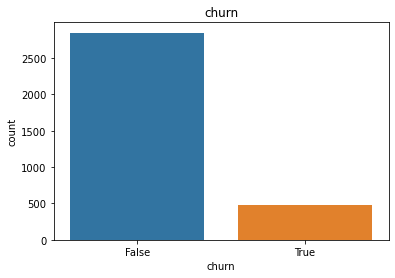

False    2850
True      483
Name: churn, dtype: int64


In [176]:
count_plot_for("churn")

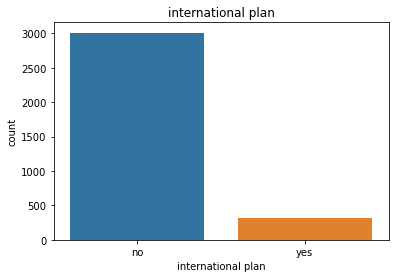

no     3010
yes     323
Name: international plan, dtype: int64


In [177]:
count_plot_for("international plan")

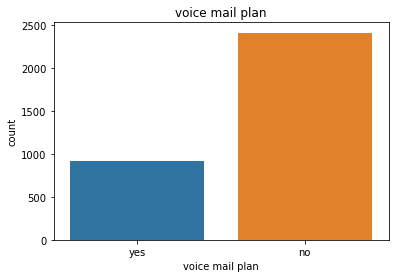

no     2411
yes     922
Name: voice mail plan, dtype: int64


In [178]:
count_plot_for("voice mail plan")

## bivariate analysis

In [179]:
def bivariate_analysis(feature, categorical_variable):
  sns.countplot(data=df, x=feature, hue=categorical_variable)
  plt.title(f"{feature} vs {categorical_variable}")
  plt.show()

  print(df.groupby([feature, categorical_variable]).size())


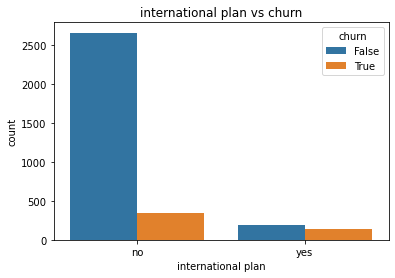

international plan  churn
no                  False    2664
                    True      346
yes                 False     186
                    True      137
dtype: int64


In [180]:
bivariate_analysis("international plan", "churn")

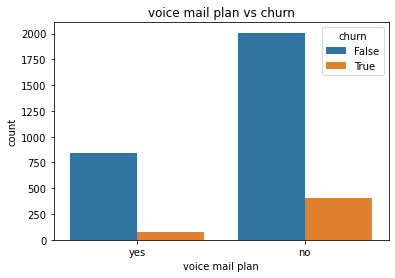

voice mail plan  churn
no               False    2008
                 True      403
yes              False     842
                 True       80
dtype: int64


In [181]:
bivariate_analysis("voice mail plan", "churn")

smote oversampling of minority
softmaxs

binnary use sigmoid

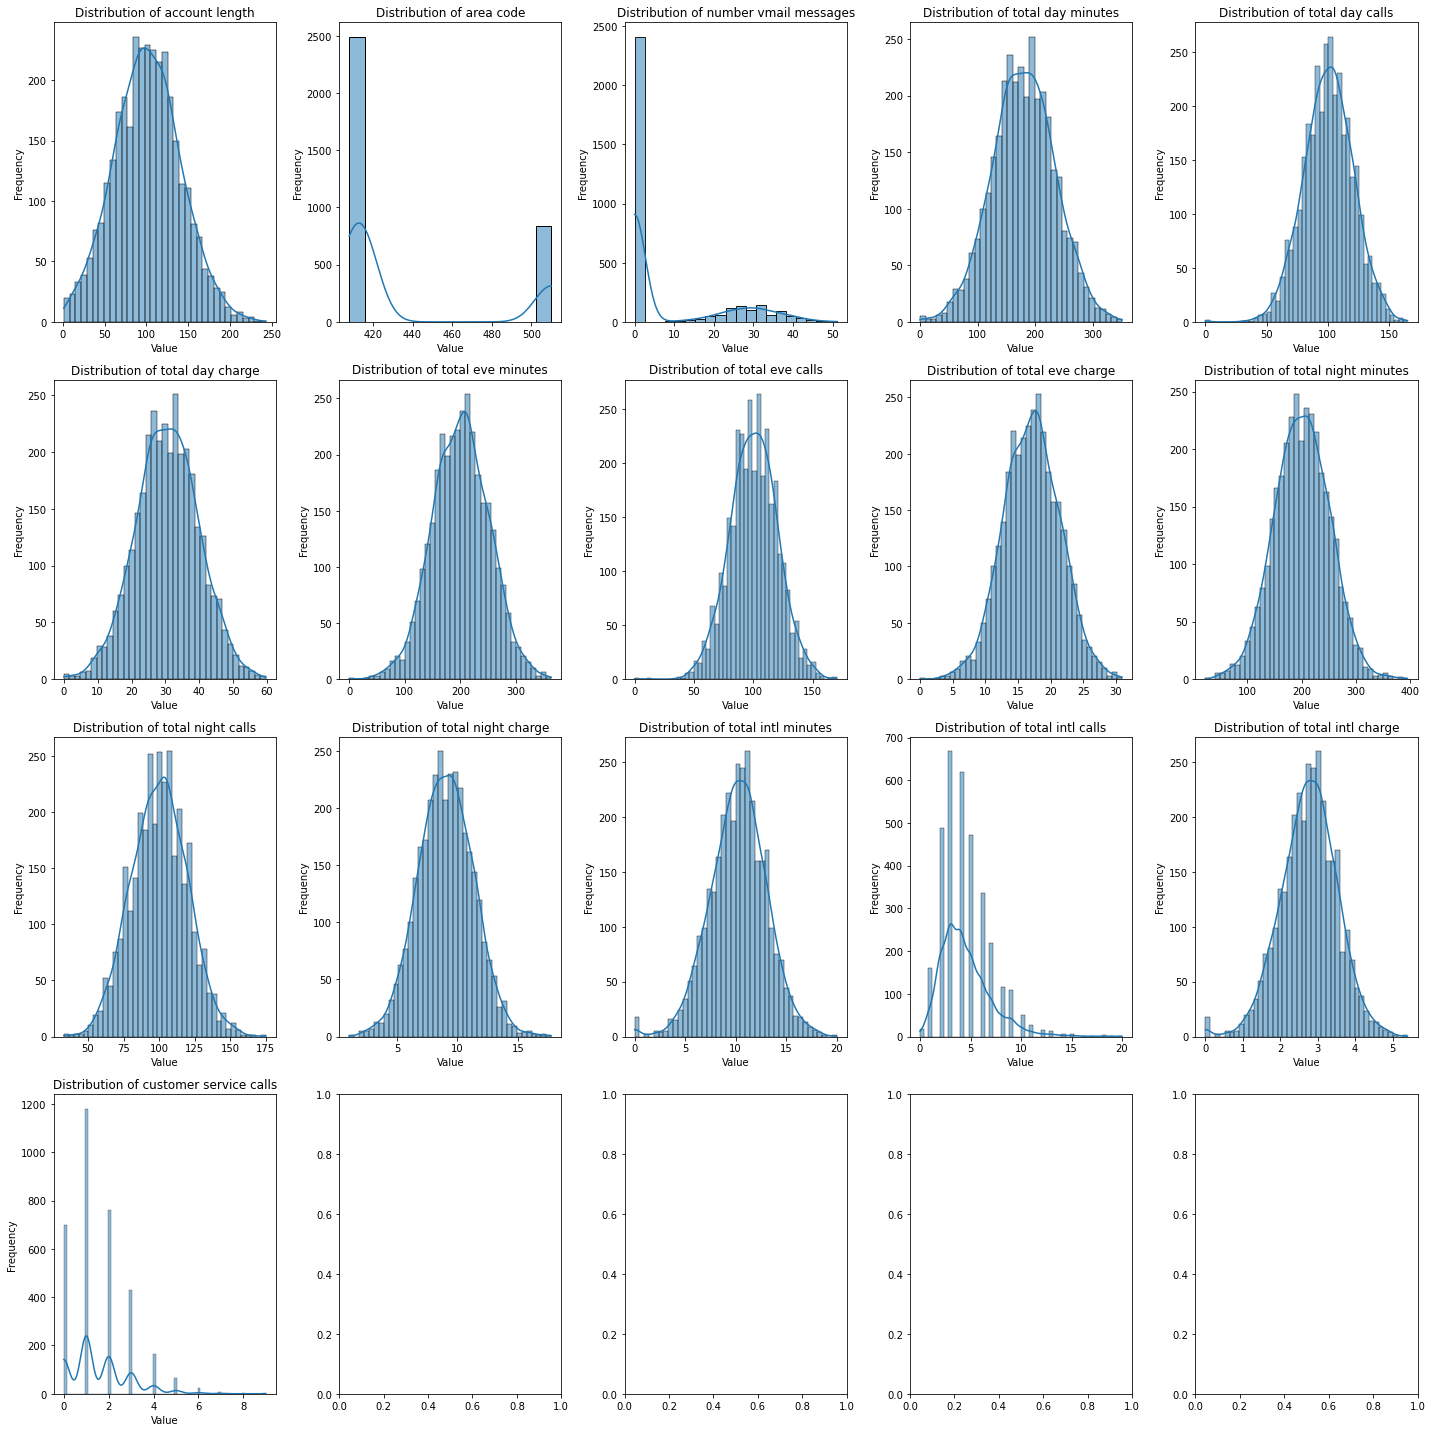

In [185]:
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(20, 20))

for ax, col in zip(axs.ravel(), df.select_dtypes(include='number').columns):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {col}')
    

plt.tight_layout()
plt.show()


# multivariate analysis

here value has more people churning

In [148]:
#checking more information about the numerical columns
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [126]:
#checking correlation heatmap
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.00,-0.01,-0.00,0.01,0.04,0.01,-0.01,0.02,-0.01,-0.01,-0.01,-0.01,0.01,0.02,0.01,-0.00,0.02
area code,-0.01,1.00,-0.00,-0.01,-0.01,-0.01,0.00,-0.01,0.00,-0.01,0.02,-0.01,-0.02,-0.02,-0.02,0.03,0.01
number vmail messages,-0.00,-0.00,1.00,0.00,-0.01,0.00,0.02,-0.01,0.02,0.01,0.01,0.01,0.00,0.01,0.00,-0.01,-0.09
total day minutes,0.01,-0.01,0.00,1.00,0.01,1.00,0.01,0.02,0.01,0.00,0.02,0.00,-0.01,0.01,-0.01,-0.01,0.21
total day calls,0.04,-0.01,-0.01,0.01,1.00,0.01,-0.02,0.01,-0.02,0.02,-0.02,0.02,0.02,0.00,0.02,-0.02,0.02
total day charge,0.01,-0.01,0.00,1.00,0.01,1.00,0.01,0.02,0.01,0.00,0.02,0.00,-0.01,0.01,-0.01,-0.01,0.21
total eve minutes,-0.01,0.00,0.02,0.01,-0.02,0.01,1.00,-0.01,1.00,-0.01,0.01,-0.01,-0.01,0.00,-0.01,-0.01,0.09
total eve calls,0.02,-0.01,-0.01,0.02,0.01,0.02,-0.01,1.00,-0.01,-0.00,0.01,-0.00,0.01,0.02,0.01,0.00,0.01
total eve charge,-0.01,0.00,0.02,0.01,-0.02,0.01,1.00,-0.01,1.00,-0.01,0.01,-0.01,-0.01,0.00,-0.01,-0.01,0.09
total night minutes,-0.01,-0.01,0.01,0.00,0.02,0.00,-0.01,-0.00,-0.01,1.00,0.01,1.00,-0.02,-0.01,-0.02,-0.01,0.04


### Feature engineering

Dealing with categorical columns

In [87]:
# Binary-encoding the voice mail plan and international plan because the values are yes and no
df['voice mail plan'] = df['voice mail plan'].replace({'yes': 1, 'no': 0})

df['international plan'] = df['international plan'].replace({'yes': 1, 'no': 0})


In [88]:
df['churn'] = df['churn'].replace({True: 1, False: 0})
df['churn'].astype(int).head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int32

In [89]:
#dropping state and phone number because they are not relevant in our analysis
df = df.drop(['state', 'phone number'], axis=1)


In [90]:
#one hot encode the column of Area code
df = pd.get_dummies(df, columns=['area code'], drop_first=True)



# Modeling

SMOTE

In [91]:
#selecting x values and y for moddeling
#we will use "churn" as our target variables so we drop the column from the dependent variables
X = df.drop('churn', axis=1)
y = df['churn']

# Perform a train_test split
# split the data to use 20% of the data as test data and random state 87 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)



using starndard scaler to scale training dataset and transform test data set

In [92]:
#importing scaler
from sklearn.preprocessing import StandardScaler
#instanciating the scaler
scaler = StandardScaler()
#
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

fitting first classification model to the training data

First model is logisticregression

In [93]:

from sklearn.linear_model import LogisticRegression
# instantiate model with random state of 87
baseline_model = LogisticRegression(random_state=87)

#fit training data into the model
baseline_model.fit(X_train_scale, y_train)


LogisticRegression(random_state=87)

Using the first model to make prediction on training and test data set

In [94]:
#making  test predictions
y_test_pred = baseline_model.predict(X_test_scale)

#making train predictions
y_train_pred = baseline_model.predict(X_train_scale)

In [135]:
#model score
baseline_score = baseline_model.score(X_test_scale, y_test)
baseline_score

0.8710644677661169

In [136]:
# cross validation score of model
baseline_cv = cross_val_score(baseline_model, X_train_scale, y_train)
baseline_cv

array([0.84456929, 0.85178236, 0.86491557, 0.85365854, 0.85553471])

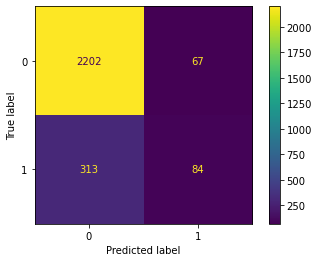

In [139]:
#confusion matrix
ConfusionMatrixDisplay.from_estimator(baseline_model, X_train_scale, y_train);

In [137]:
#classification report of model
base_report = classification_report(y_test, y_test_pred)
print(base_report)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       581
           1       0.50      0.21      0.30        86

    accuracy                           0.87       667
   macro avg       0.70      0.59      0.61       667
weighted avg       0.84      0.87      0.85       667



## Decision Tree

In [99]:

tree_clf = DecisionTreeClassifier(random_state=87)

tree_clf.fit(X_train_scale, y_train)
y_tree_pred = tree_clf.predict(X_test_scale)

# Decision tree model score
tree_train_score = tree_clf.score(X_train_scale, y_train)
print('Trained data score: ', tree_train_score)

# Scoring on test data
tree_test_score = tree_clf.score(X_test_scale, y_test)
print('Test data score: ', tree_test_score)

Trained data score:  1.0
Test data score:  0.9085457271364318


In [100]:
# Cross Validation
tree_cv = cross_val_score(tree_clf, X_train_scale, y_train)
tree_cv

array([0.89325843, 0.90243902, 0.89118199, 0.93058161, 0.89868668])

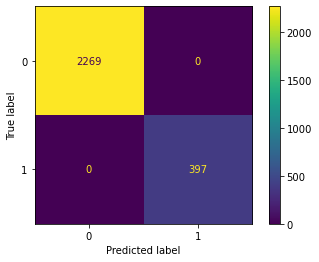

In [140]:
# Train Confusion Matrix
ConfusionMatrixDisplay.from_estimator(tree_clf, X_train_scale, y_train);

In [101]:
# Report
tree_report = classification_report(y_test, y_tree_pred)
print(tree_report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       581
           1       0.63      0.69      0.66        86

    accuracy                           0.91       667
   macro avg       0.79      0.81      0.80       667
weighted avg       0.91      0.91      0.91       667



# EVALUATION

YOU have to choose the metrics you choose and go with it

# K-NEAREST NEIGHBORS

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

knn_clf.fit(X_train_scale, y_train)
knn_y_pred = knn_clf.predict(X_test_scale)
knn_y_pred_proba = knn_clf.predict_proba(X_test_scale)


In [104]:
#getting the model score
knn_clf_score = knn_clf.score(X_train_scale, y_train)
knn_clf_score

0.9167291822955739

In [105]:
# Cross Validation
knn_clf_cvscore = cross_val_score(knn_clf, X_train, y_train)
knn_clf_cvscore

array([0.8670412 , 0.87429644, 0.87992495, 0.87242026, 0.85553471])

In [106]:
# Report 
knn_clf_creport = classification_report(y_test, knn_y_pred)
print(knn_clf_creport)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       581
           1       0.65      0.35      0.45        86

    accuracy                           0.89       667
   macro avg       0.78      0.66      0.70       667
weighted avg       0.88      0.89      0.88       667



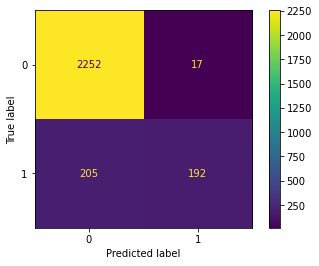

In [107]:
# With estimators
ConfusionMatrixDisplay.from_estimator(knn_clf, X_train_scale, y_train);

# Random Forest

In [141]:

from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=87)


rfc_clf = RandomForestClassifier(n_estimators=5, random_state=87)

rfc_clf.fit(X_train_scale, y_train)

rfc_clf_pred = rfc_clf.predict(X_test_scale)

In [142]:
rfc_clf_score = rfc_clf.score(X_train_scale, y_train)
rfc_clf_score

0.991747936984246

In [143]:
# Cross validation
rfc_clf_cvscore = cross_val_score(rfc_clf, X_train_scale, y_train)
rfc_clf_cvscore

array([0.93445693, 0.9249531 , 0.93058161, 0.93621013, 0.90243902])

In [146]:
# Report
rfc_clf_creport = classification_report(y_test, rfc_clf_pred)
print(rfc_clf_creport)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       581
           1       0.88      0.60      0.72        86

    accuracy                           0.94       667
   macro avg       0.91      0.80      0.84       667
weighted avg       0.94      0.94      0.93       667



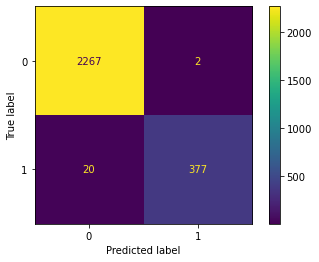

In [147]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rfc_clf, X_train_scale, y_train);

# CONCLUSION

EDA first
based on the model choose the best
we chose this and this model

# RECOMMENDATION